<a href="https://colab.research.google.com/github/riyaj5246/BPM_data_analysis/blob/main/TargetProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import re
from scipy.fft import fft, fftfreq
import scipy as sy
import pandas as pd
import datetime
import sys
import os
import random
import json
import struct
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import svd

In [2]:
from google.colab import drive
drive.mount('/gdrive')
#Example location. Change to where you have the data
%cd /gdrive/MyDrive/Target/BPM-DATA

Mounted at /gdrive
/gdrive/MyDrive/Target/BPM-DATA


In [3]:
#header data is already well formatted --> look at the data files
bpm_data = pd.read_csv('vert6-23-21header.csv')
bpm_data2 = pd.read_csv('vert6-23-21data.csv')
print(bpm_data.columns)
print(bpm_data2)

Index(['name', 'endian_type', 'version', 'status', 'tstamp_sec', 'tstamp_nsec',
       'starting_turn', 'num_turns', 'time_in_cycle', 'data_type',
       'trigger_type', 'trigger_value', 'data_source', 'particle_type',
       'scaled_data', 'cal_id', 'beam_freq', 'attenuation'],
      dtype='object')
           name  turn_number    position     intensity
0      R:TFV101            0  999.000000     15.050496
1      R:TFV101            1  999.000000     12.866214
2      R:TFV101            2  999.000000      9.708204
3      R:TFV101            3  999.000000     12.667109
4      R:TFV101            4  999.000000     11.123106
...         ...          ...         ...           ...
53243  R:TFV641          507    4.158847  12182.257812
53244  R:TFV641          508    4.149826  12172.199219
53245  R:TFV641          509    4.122818  12170.129883
53246  R:TFV641          510    4.136003  12172.664062
53247  R:TFV641          511    4.121979  12183.898438

[53248 rows x 4 columns]


In [4]:
print(bpm_data2.columns)
bpm_data2.head()

Index(['name', 'turn_number', 'position', 'intensity'], dtype='object')


,name,turn_number,position,intensity
0,R:TFV101,0,999.0,15.050496
1,R:TFV101,1,999.0,12.866214
2,R:TFV101,2,999.0,9.708204
3,R:TFV101,3,999.0,12.667109
4,R:TFV101,4,999.0,11.123106


In [ ]:
intensityPlot = bpm_data2['intensity'].plot(kind ='hist', bins = 100)

In [ ]:
positionPlot = bpm_data2['position'].plot(kind ='hist', bins = 5)

In [ ]:
scatterPlot = bpm_data2.plot(kind = 'scatter', x='turn_number', y='position')

In [5]:
turnNum = []
position = []
intensity = []

def isDataValid(counter, plots, row):
  if counter != 1 and counter%2 == 1:
    if float(plots[row][2]) != 999:
      return True
  
  return False
 
#walks through csv file and filters data into turnNum, position, and intensity lists
def addDataToLists():
  counter = 0  
  with open('vert6-23-21data.csv','r') as csvfile:
      plots = csv.reader(csvfile, delimiter = ',')
      plots = list(plots)

      #loop goes through every row in csv file
      for row in range(106497):
        counter += 1
        if isDataValid(counter, plots, row):
          turnNum.append(float(plots[row][1]))
          position.append(float(plots[row][2]))
          intensity.append(float(plots[row][3]))

#plots a scatter plot based on x and y axis data
def scatterPlot(xAxisData, xAxisName, yAxisData, yAxisName):
  plt.scatter(xAxisData, yAxisData, color = 'r', s = 1)
  plt.xticks(rotation = 25)
  plt.xlabel(xAxisName)
  plt.ylabel(yAxisName)
  plt.title(yAxisName + ' vs. ' + xAxisName, fontsize = 20)
  plt.show()

#plots a histogram plot given data
def histogramPlot(dataUsed, horizLabel):
  plt.hist(dataUsed, color = '000000', bins = 50)
  plt.xlabel(horizLabel)
  plt.ylabel('Frequency')
  plt.title('Frequency of Particle ' + horizLabel, fontsize = 20)
  plt.show()

#adds data to lists and produces graphs
def graphData():
  addDataToLists()
  scatterPlot(intensity, 'Intensity', position, 'Position')
  scatterPlot(turnNum, 'Turn Number', position, 'Position')
  scatterPlot(turnNum, 'Turn Number', intensity, 'Intensity')
  histogramPlot(position, 'Positions')
  histogramPlot(intensity, 'Intensities')

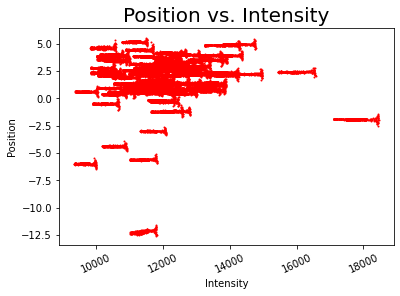

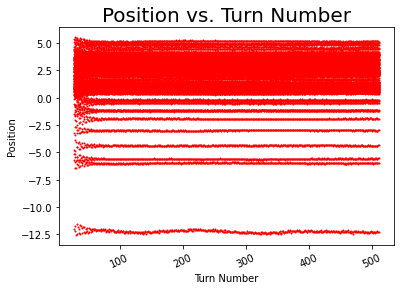

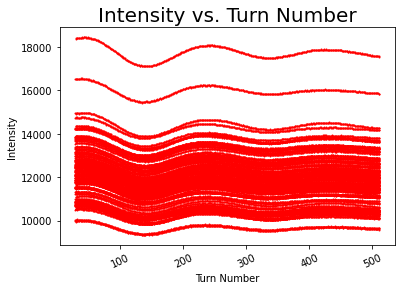

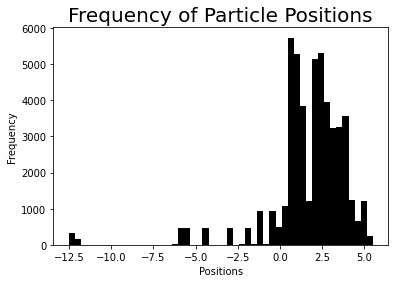

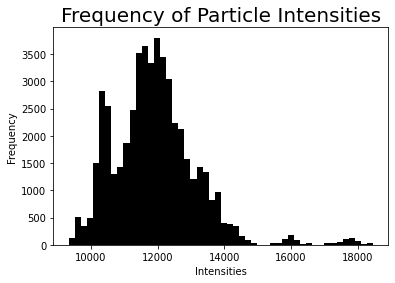

In [6]:
graphData()

**Individual BPM Position v. Turn Num**

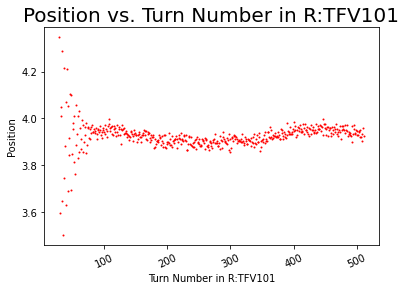

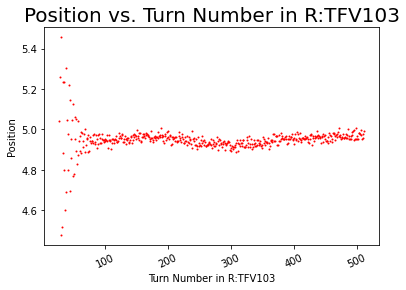

In [8]:
def graph_posvsturn(name_index = 2):
  counter = 0
  individual_bpm_data = []
  name = ""

  with open('vert6-23-21data.csv','r') as csvfile:
      plots = csv.reader(csvfile, delimiter = ',')
      plots = list(plots)
      bpm_name = plots[name_index][0]
      name = bpm_name

      turnNum = []
      position = []
      intensity = []

      for row in range(106497):
        counter += 1
        if isDataValid(counter, plots, row):
          if bpm_name == plots[row][0]:
            turnNum.append(float(plots[row][1]))
            position.append(float(plots[row][2]))
            intensity.append(float(plots[row][3]))

      individual_bpm_data.append(turnNum)
      individual_bpm_data.append(position)
      individual_bpm_data.append(intensity)
                          
  scatterPlot(individual_bpm_data[0], "Turn Number in " + name, individual_bpm_data[1], "Position")

graph_posvsturn() #default is tfv101
graph_posvsturn(1026) #input the number of the beginning index of a new BPM to graph positions for that BPM

**Avg Position v. BPM Name**

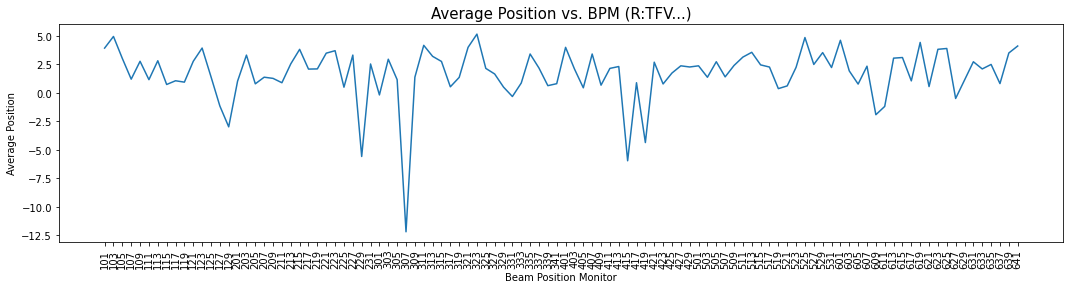

In [ ]:
#returns the average value of a single BPM --> either avg position or avg intensity
def getAvg(bpm_name, type):
  counter = 0
  data = []
  sum = 0

  with open('vert6-23-21data.csv','r') as csvfile:
      plots = csv.reader(csvfile, delimiter = ',')
      plots = list(plots)

      for row in range(106497):
        counter += 1
          if isDataValid(counter, plots, row):
            if bpm_name == plots[row][0]:
              if type == 'position':
                data.append(float(plots[row][2]))
              elif type == 'intensity':
                data.append(float(plots[row][3]))  
  
  for num in data:
    sum = sum + num
  
  avg = sum/len(data)
  return avg

#graphs averages - either position (default) or intensity
def graphAvg(type = 'Position'):
  names_list = []
  avg_list = []
  counter = 0

  with open('vert6-23-21data.csv','r') as csvfile:
        plots = csv.reader(csvfile, delimiter = ',')
        plots = list(plots)
        bpm_name = ""

        for row in range(106497):
          counter += 1
            if isDataValid(counter, plots, row):
              if bpm_name != plots[row][0]:
                bpm_name = plots[row][0]
                names_list.append(bpm_name[5:])
                if type == 'Position':
                  avg_list.append(getAvg(bpm_name, 'position'))
                elif type == 'Intensity':
                  avg_list.append(getAvg(bpm_name, 'intensity'))  
    
  plt.figure(figsize=(18,4))
  if type == 'Position':
    plt.plot(names_list,avg_list)
  else:
    plt.bar(names_list, avg_list) 
    plt.ylim([9000, 19000]) 
  plt.title('Average ' + type +' vs. BPM (R:TFV...)', fontsize = 15)
  plt.xlabel('Beam Position Monitor')
  plt.ylabel('Average ' + type)
  plt.xticks(rotation=90)
  plt.show()

graphAvg('Position')

**Avg Intensity vs. BPM**

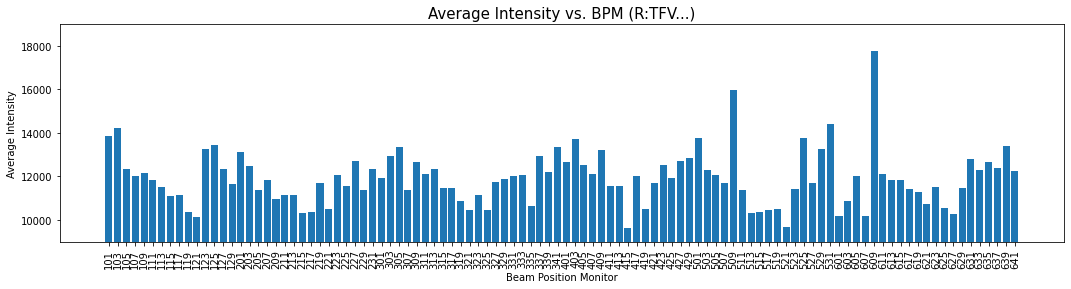

In [ ]:
graphAvg('Intensity')

**Checking timestamp function**

In [ ]:
bpm_head = pd.read_csv('vert6-23-21header.csv')

def check_time():
  timestampA = 0
  timestampB = 0

  for key in bpm_head['tstamp_sec']:
    if(timestampA == 0):
      timestampA = key
      st = datetime.datetime.fromtimestamp(timestampA).strftime('%Y-%m-%d %H:%M:%S')
      print("Data timestamp(", str(timestampA), "): ",st)
    else:
      timestampB = key
      if timestampA != timestampB:
        st = datetime.datetime.fromtimestamp(timestampB).strftime('%Y-%m-%d %H:%M:%S')
        print("Bad timestamp(", str(timestampB),"): ", key, st)
      timestampA = timestampB
  return

check_time()

Data timestamp( 1624458928 ):  2021-06-23 14:35:28
